# PROBLEM STATEMENT

Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Uploading the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")



In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
data.shape  ###no.of rows and coloumn

(907, 27)

In [4]:
data.dtypes   ###Hleps us to know Each feature have the type of datatype

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
data.nunique()


country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

we can see that some coloumns like 0ther_fuel3,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh doesnot have any value and we can deop that coloumn,Also we can able to see some coloumns like country,country_long,other_fuel2,year_of_capacity_data,generation_data_source have only 1value so we drop those coloumn also

In [6]:
data.drop(columns=["country","country_long"],axis=1,inplace=True)

In [7]:
data.drop(columns=["other_fuel2", "year_of_capacity_data","generation_gwh_2013","other_fuel3","wepp_id","generation_gwh_2019","estimated_generation_gwh"], axis=1, inplace=True)


In [8]:
data.columns


Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [9]:
data.drop("name",axis=1,inplace=True)

In [10]:
data.isnull().sum()   ###Find the null values in our dataset


gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [11]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [12]:
#so we can remove the same also
data.drop("generation_data_source",axis=1,inplace=True)

In [13]:
data.drop("owner",axis=1,inplace=True)

In [14]:
#Now check null values again
data.isnull().sum()


gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [15]:
# Filling missing values in lattitude using mean

data["latitude"] = data["latitude"].fillna(data["latitude"].mean())

In [16]:
#replace the values in generation_gwh_2014 using knn imputers

from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2014"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2014"]
knn_imp


,capacity_mw,generation_gwh_2014
0,2.5,16.779017
1,98.0,324.532517
2,39.2,85.185267
3,135.0,617.789264
4,1800.0,3035.550000
...,...,...
902,1600.0,3691.517167
903,3.0,16.779017
904,25.5,16.779017
905,80.0,213.394333


In [17]:
data["generation_gwh_2014"]=knn_imp["generation_gwh_2014"]
data['generation_gwh_2014']


0        16.779017
1       324.532517
2        85.185267
3       617.789264
4      3035.550000
          ...     
902    3691.517167
903      16.779017
904      16.779017
905     213.394333
906      16.779017
Name: generation_gwh_2014, Length: 907, dtype: float64

In [18]:
#impute values in all coloumns generation_gwh_2015

knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2015"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2015"]
data["generation_gwh_2015"]=knn_imp["generation_gwh_2015"]





In [19]:
#generation_gwh_2016
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2016"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2016"]
data["generation_gwh_2016"]=knn_imp["generation_gwh_2016"]


In [20]:
#generation_gwh_2017
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2017"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2017"]
data["generation_gwh_2017"]=knn_imp["generation_gwh_2017"]

In [21]:
#generation_gwh_2018
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2018"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2018"]
data["generation_gwh_2018"]=knn_imp["generation_gwh_2018"]



In [22]:
data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450


In [23]:
# Replacing the null value by its mode 

data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])


In [24]:
#Replacing null values with mode 

data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])

In [25]:
# Replacing null values using  median values

data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["commissioning_year"] = data["commissioning_year"].fillna(data["commissioning_year"].median())

In [26]:
#now check is there any null value present in te dataset.

data.isnull().sum()


gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [27]:
data.drop('url',axis=1,inplace=True) ###as it is not necessary


In [28]:
data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450


# Statistical analysis

In [29]:
# Statistical Analysis of dataset
data.describe()


,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1998.728776,1216.741950,1225.073916,1247.908108,1294.299953,1348.291762
std,590.085456,6.079148,4.815073,13.158621,2944.274717,3119.361453,3138.569942,3187.953881,3293.148855
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,16.779017,13.293200,8.974900,22.244883,47.968950
50%,59.200000,21.281800,76.719500,2001.000000,171.853083,139.546801,131.021600,128.822650,133.912800
75%,385.250000,25.176450,79.206100,2003.000000,926.055500,735.113025,780.149650,817.977250,810.733240
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [30]:
data['Powerplant_age']=2019-data['commissioning_year']
data.drop('commissioning_year',axis=1,inplace=True)
data.head()


,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


In [31]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [32]:
# checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']


# visvalization

# Univariate analysis

In [33]:
print(data["primary_fuel"].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


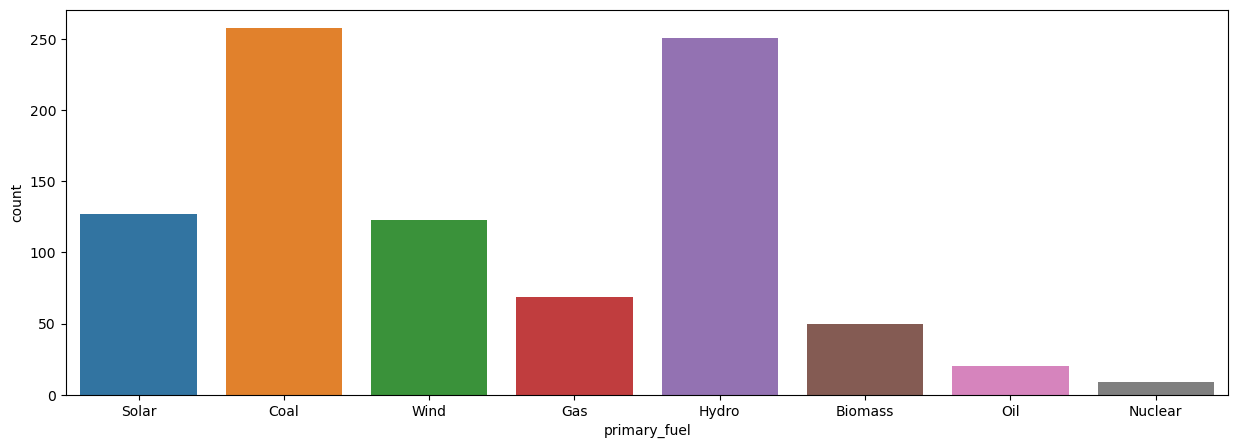

In [34]:
# Visualizing the types of fuel in primary_fuel
plt.figure(figsize=(15,5))
sns.countplot(data["primary_fuel"])
plt.show()


Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


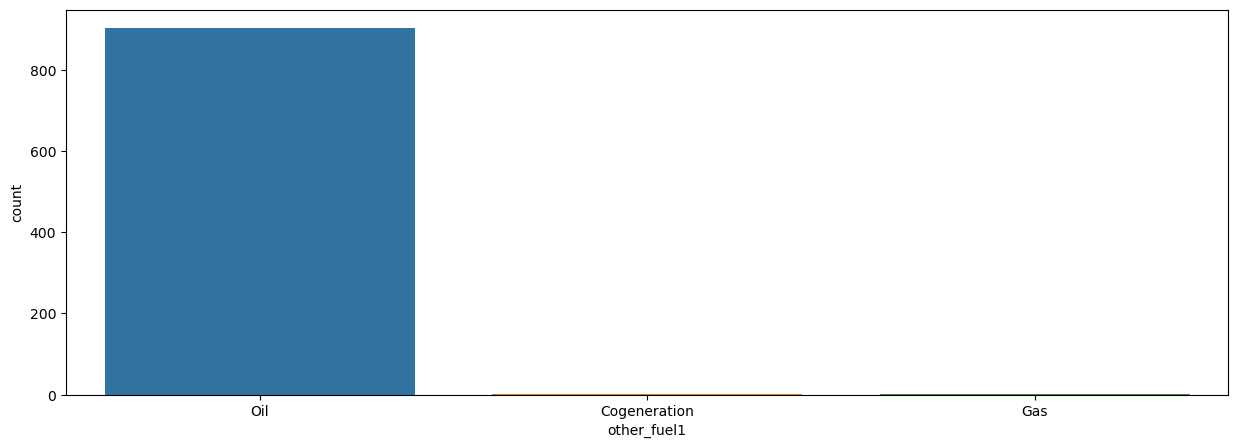

In [35]:
# Visualizing the counts of other fuel
print(data["other_fuel1"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(data["other_fuel1"])
plt.show()


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


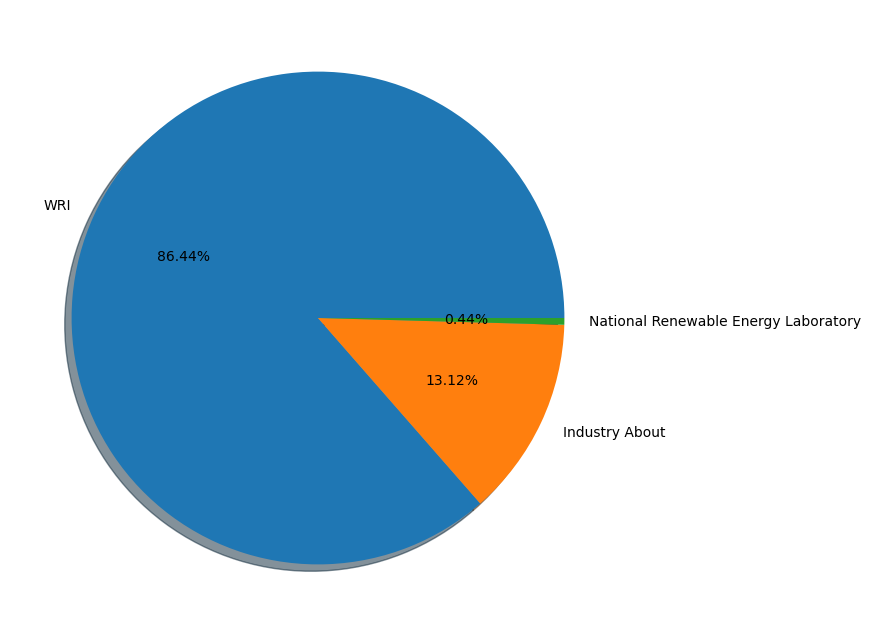

In [36]:
# Visualizing the counts of geolocation source

print(data["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


# Bivariate  Analysis

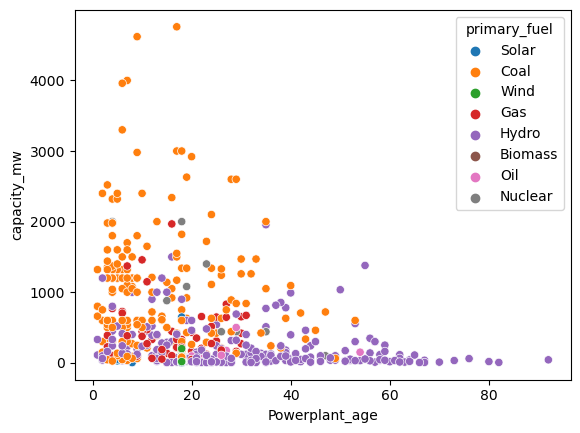

In [37]:

sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = data)
plt.show()


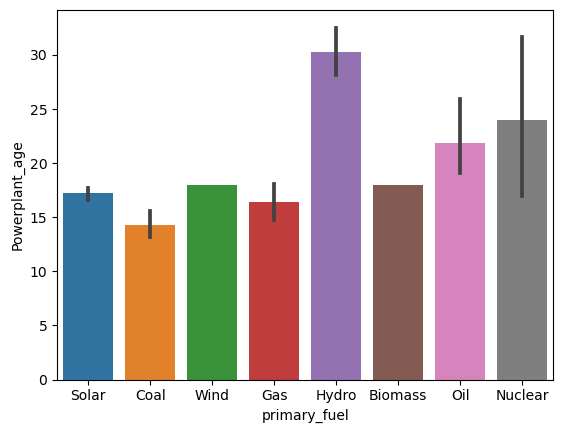

In [38]:
#relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Powerplant_age", data = data)
plt.show()


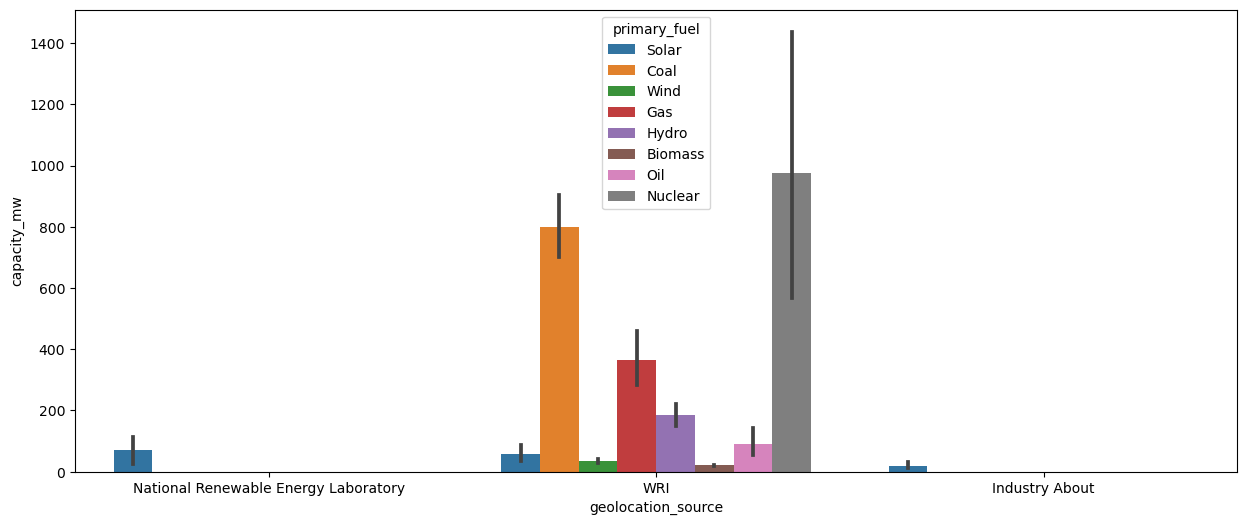

In [39]:
#relation between source and capacity_mw

plt.figure(figsize = (15,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = data,hue='primary_fuel')
plt.show()



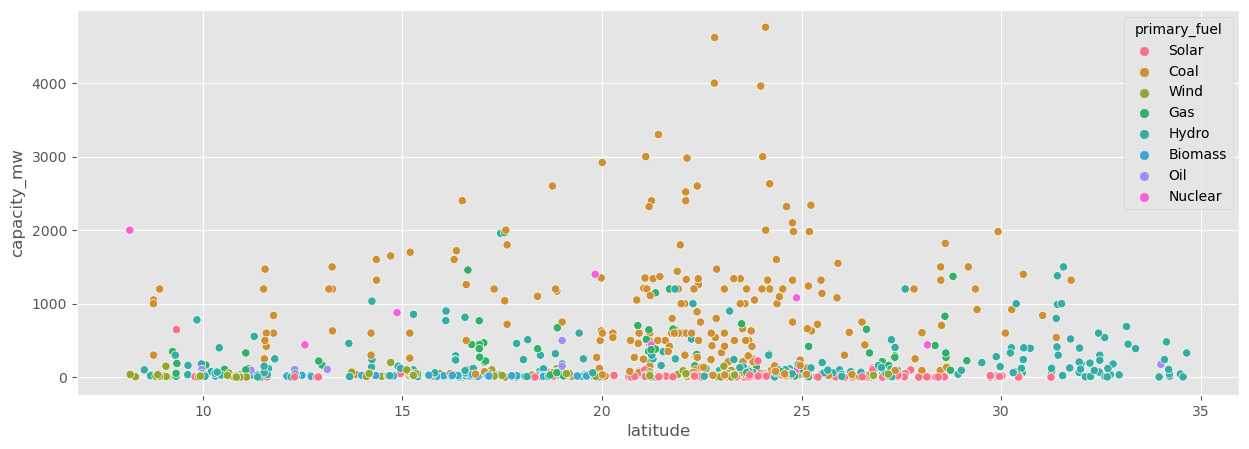

In [40]:
# capacity is reated to latitude of the power plant.

plt.figure(figsize=[15,5])
plt.style.use('ggplot')
sns.scatterplot(data['latitude'],data["capacity_mw"],hue=data['primary_fuel']);


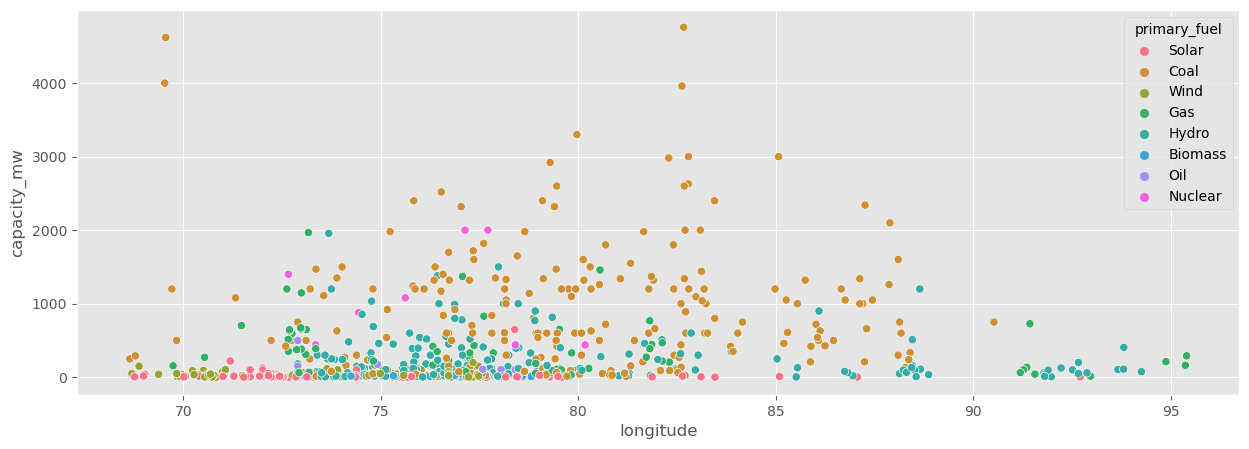

In [41]:
# longitude related to the capacity of the power plant
plt.figure(figsize=[15,5])
plt.style.use('ggplot')

sns.scatterplot(data['longitude'],data["capacity_mw"],hue=data['primary_fuel']);


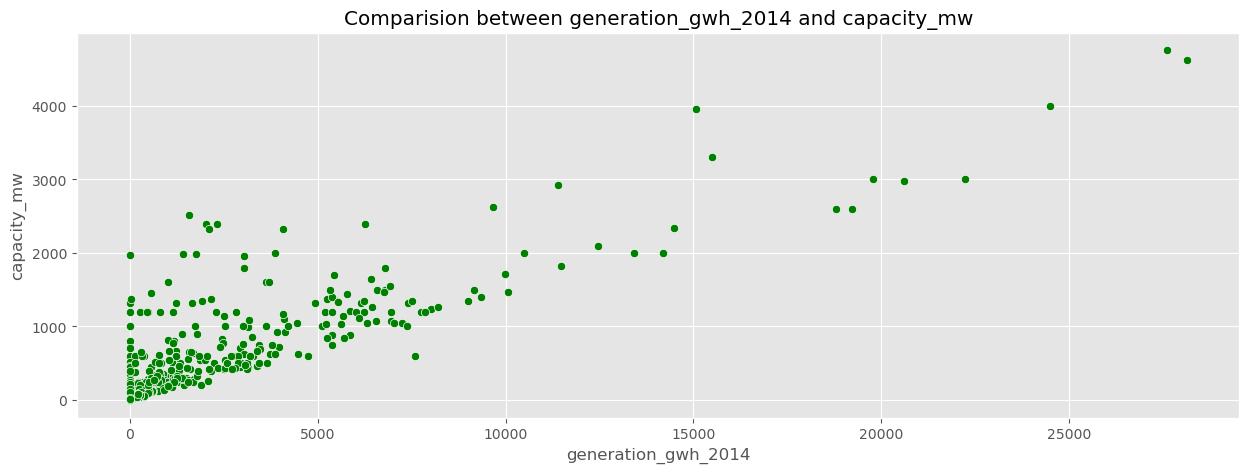

In [42]:
# capacity of the plant in generation_gwh_2014

plt.figure(figsize = (15,5))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = data,color="g")
plt.show()


     


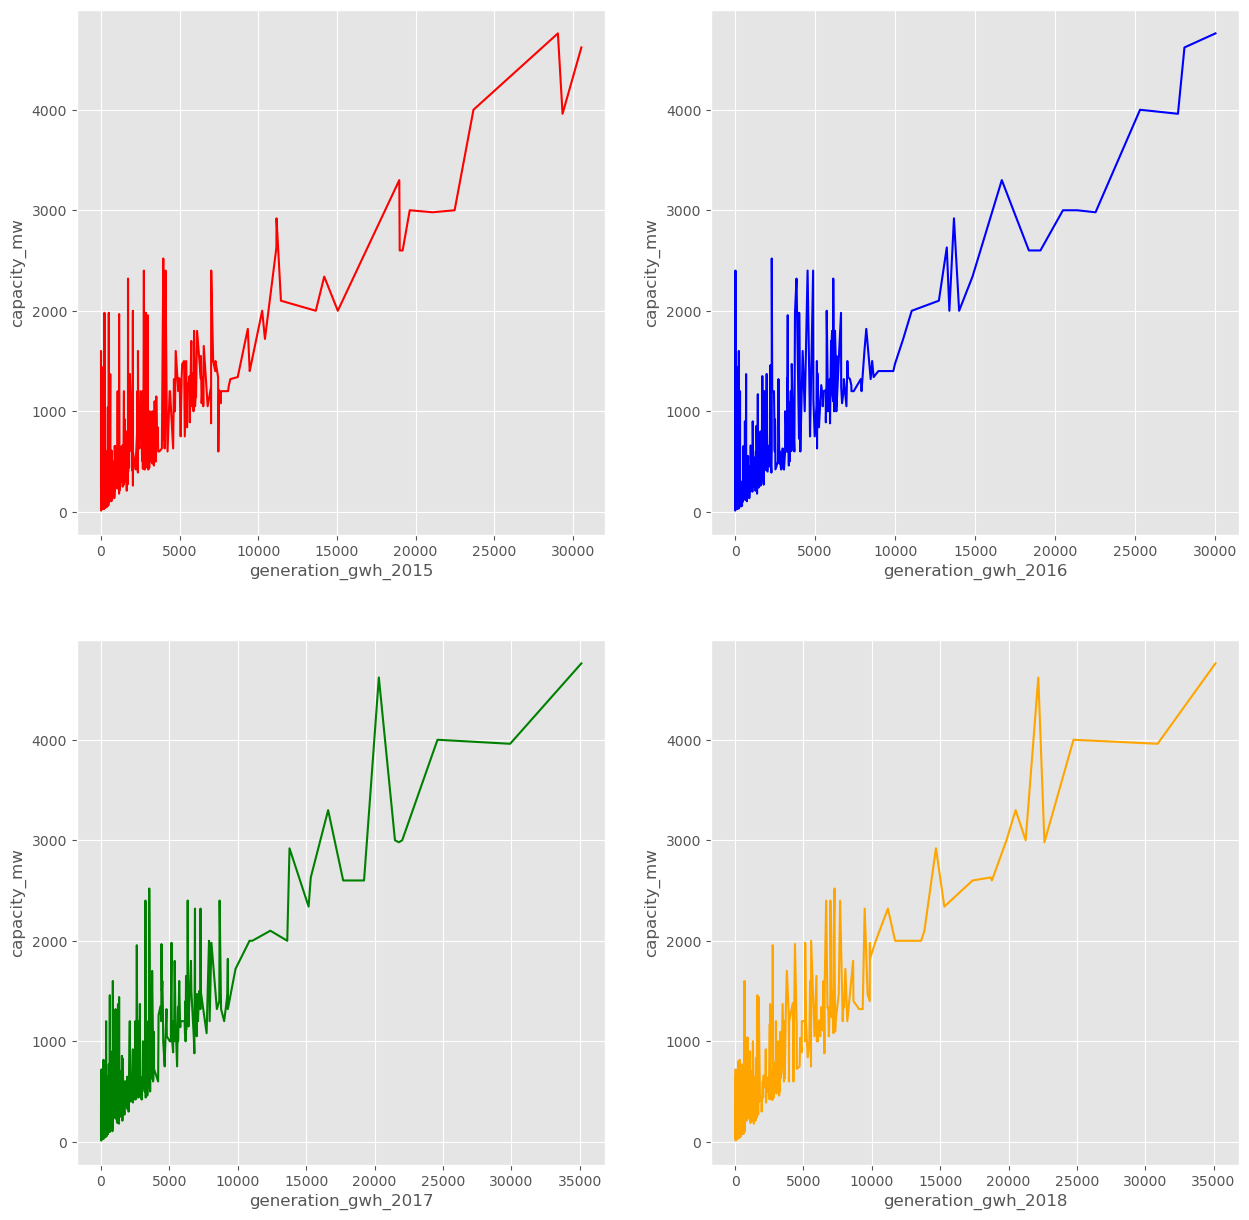

In [43]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking attrition level in Daily rate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=data,color="r")

# Checking attrition level in hourly rate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=data,color="b")

# Checking attrition level in Monthly rate
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=data,color="g")

# Checking attrition level in Monthly income
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=data,color="orange")
plt.show()


we can see,There is a linear relationship between the capacity and the electricity generation for the years mentioned above.
From The above plot we can seee lectricity generationfor the years 2015,2016,2017,2018 have high capacity of above 1000mw. Also power generation growth is more than 5000gwh in
forall the years.
As the electricity generation growth increases, the capacity plant  also increases.

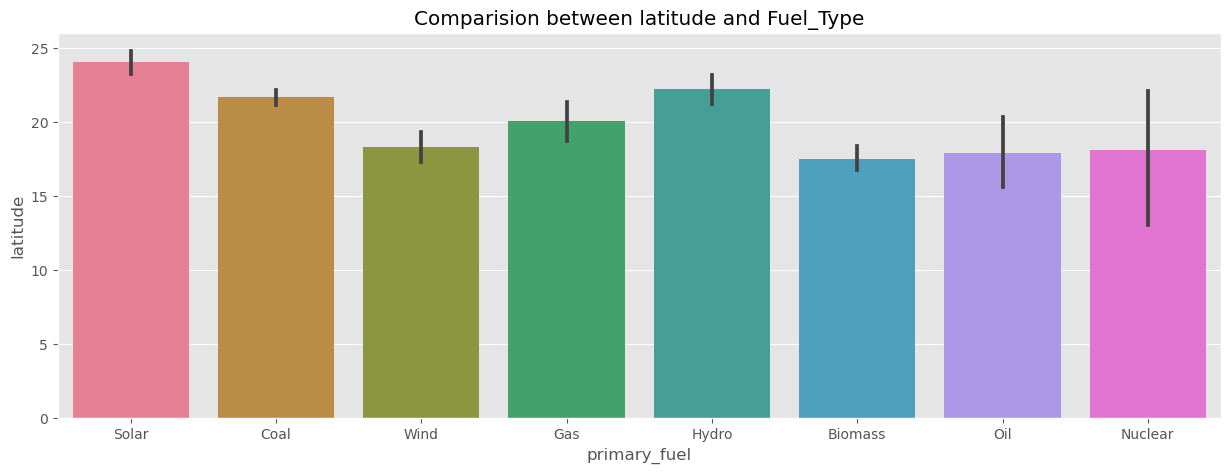

In [44]:
#  fuel type is reated to latitude of the power plant
plt.figure(figsize=[15,5])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(data['primary_fuel'],data["latitude"],palette="husl");



# Multivariate analysis

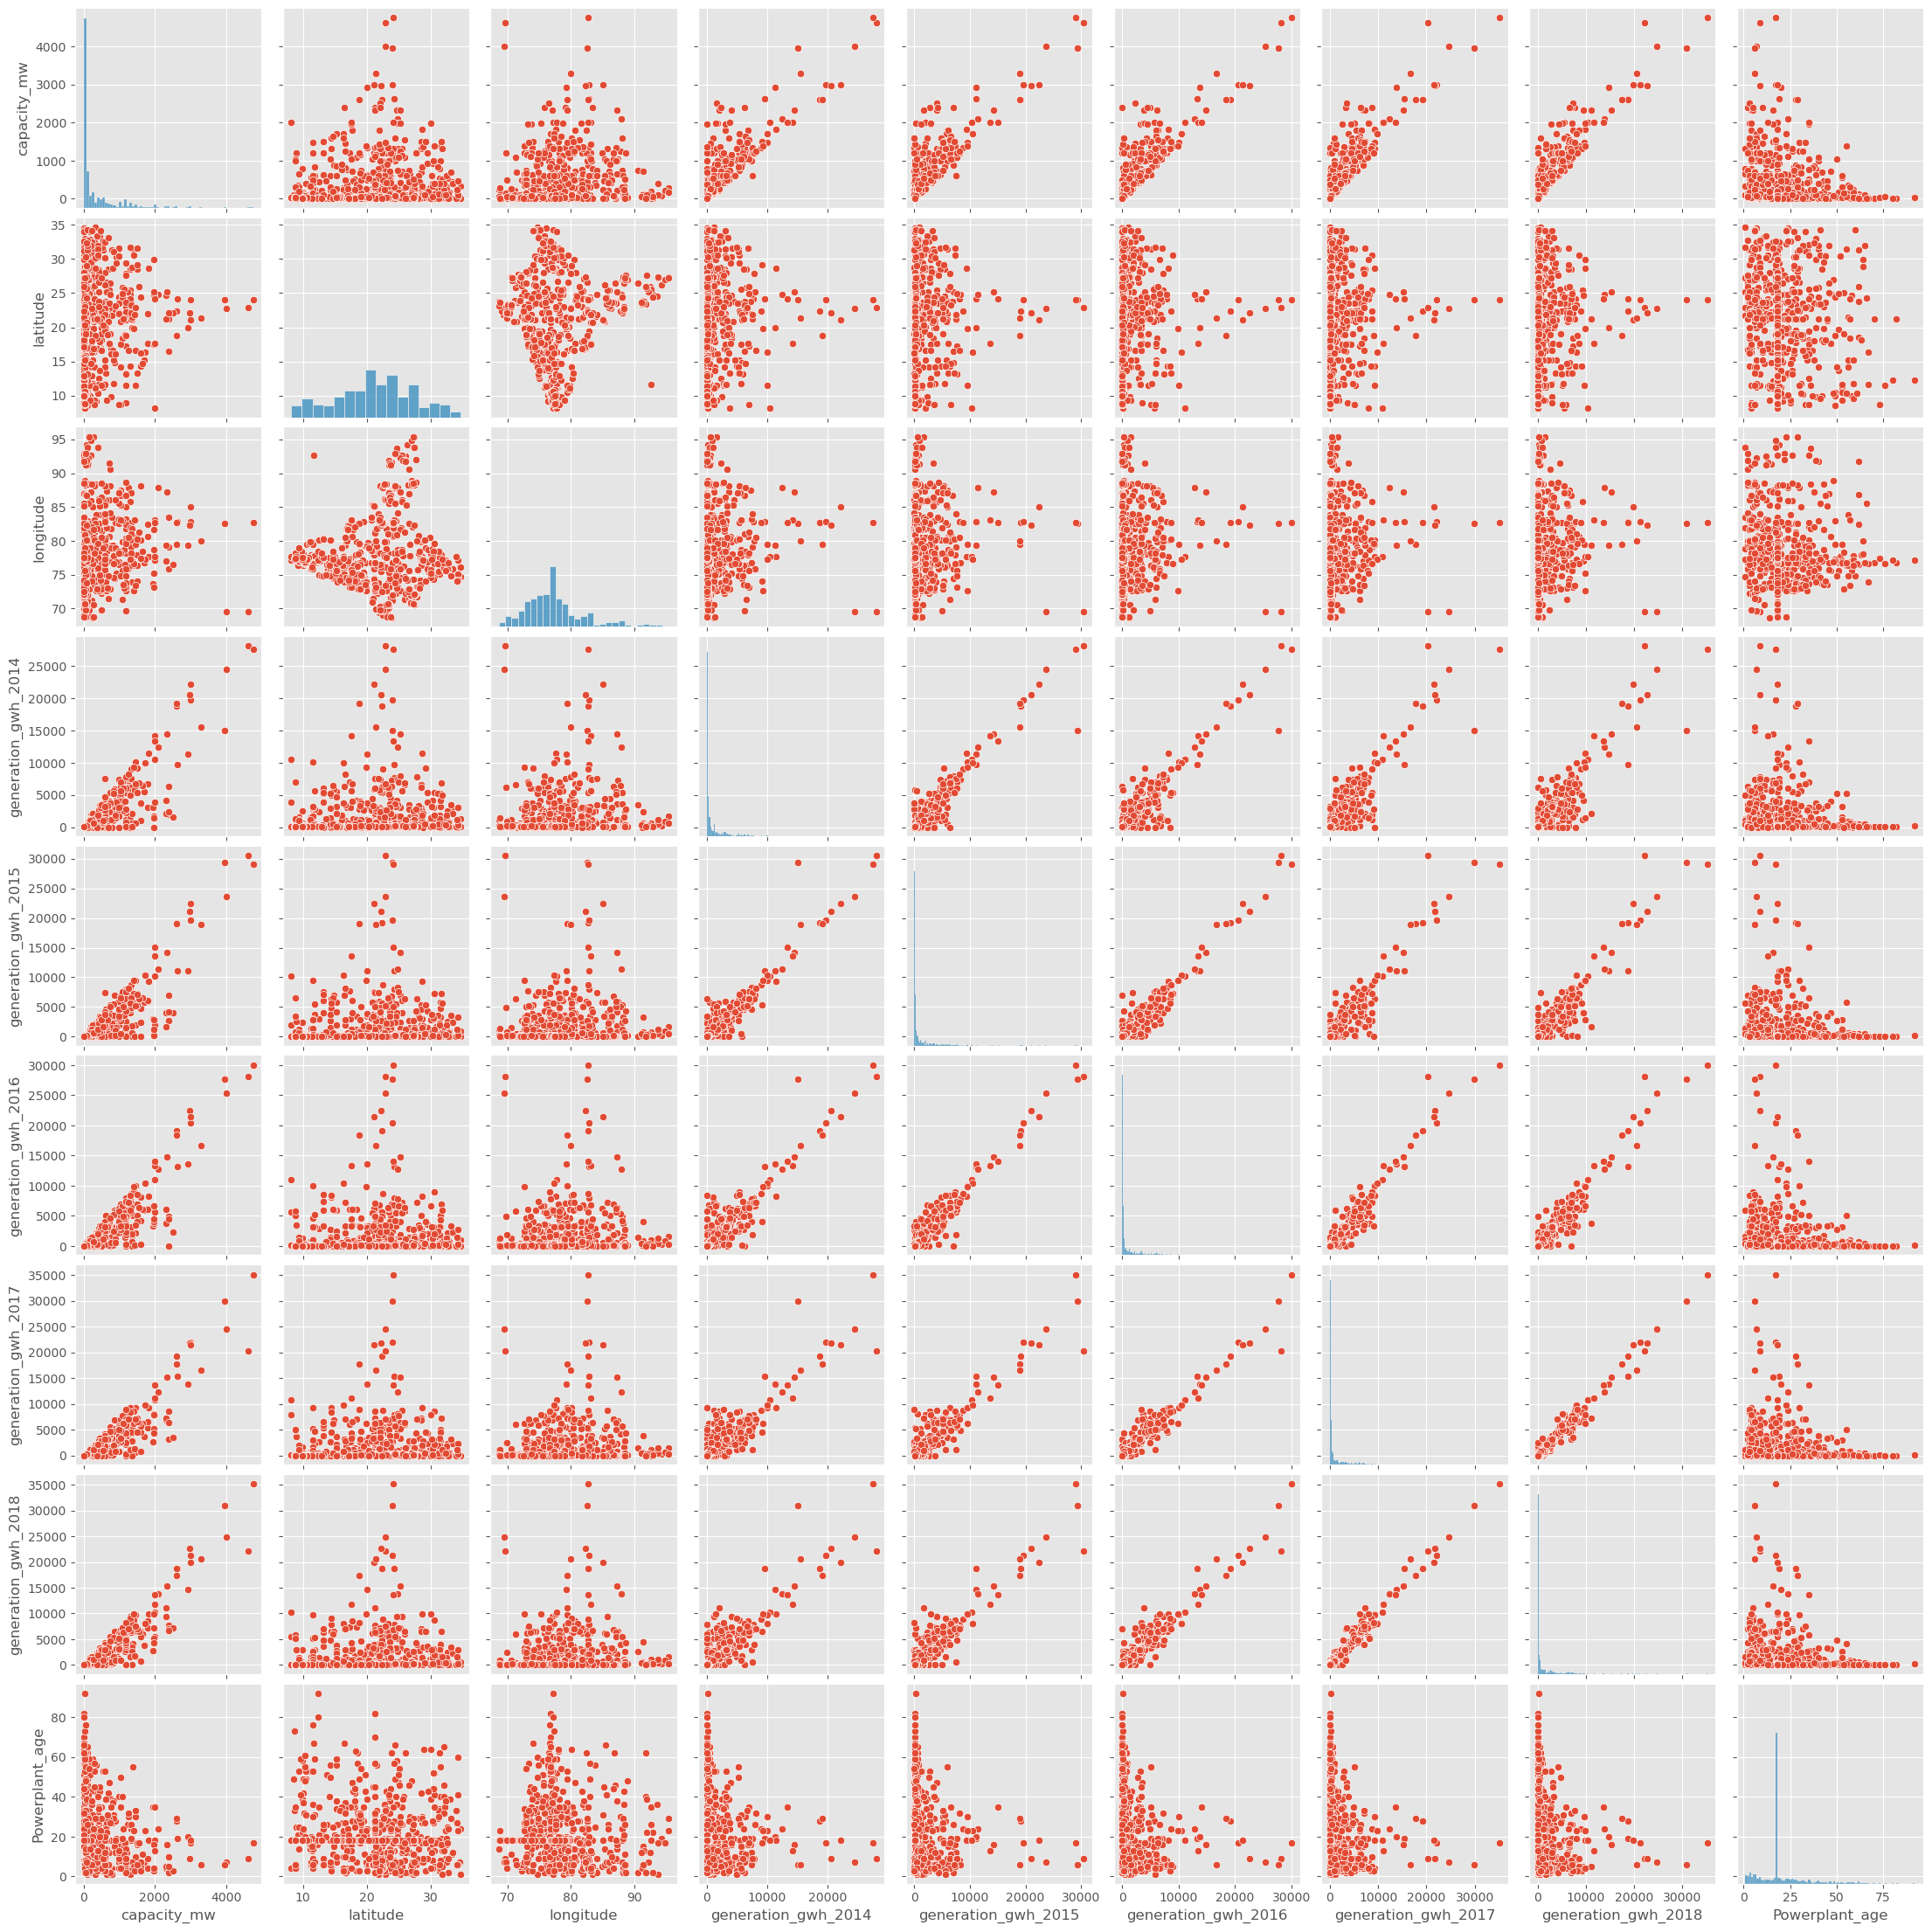

In [45]:
# Checking the relation between the features.
sns.pairplot(data)


From the above plot ,we can see multicollinerity is present

# Checking the Outliers

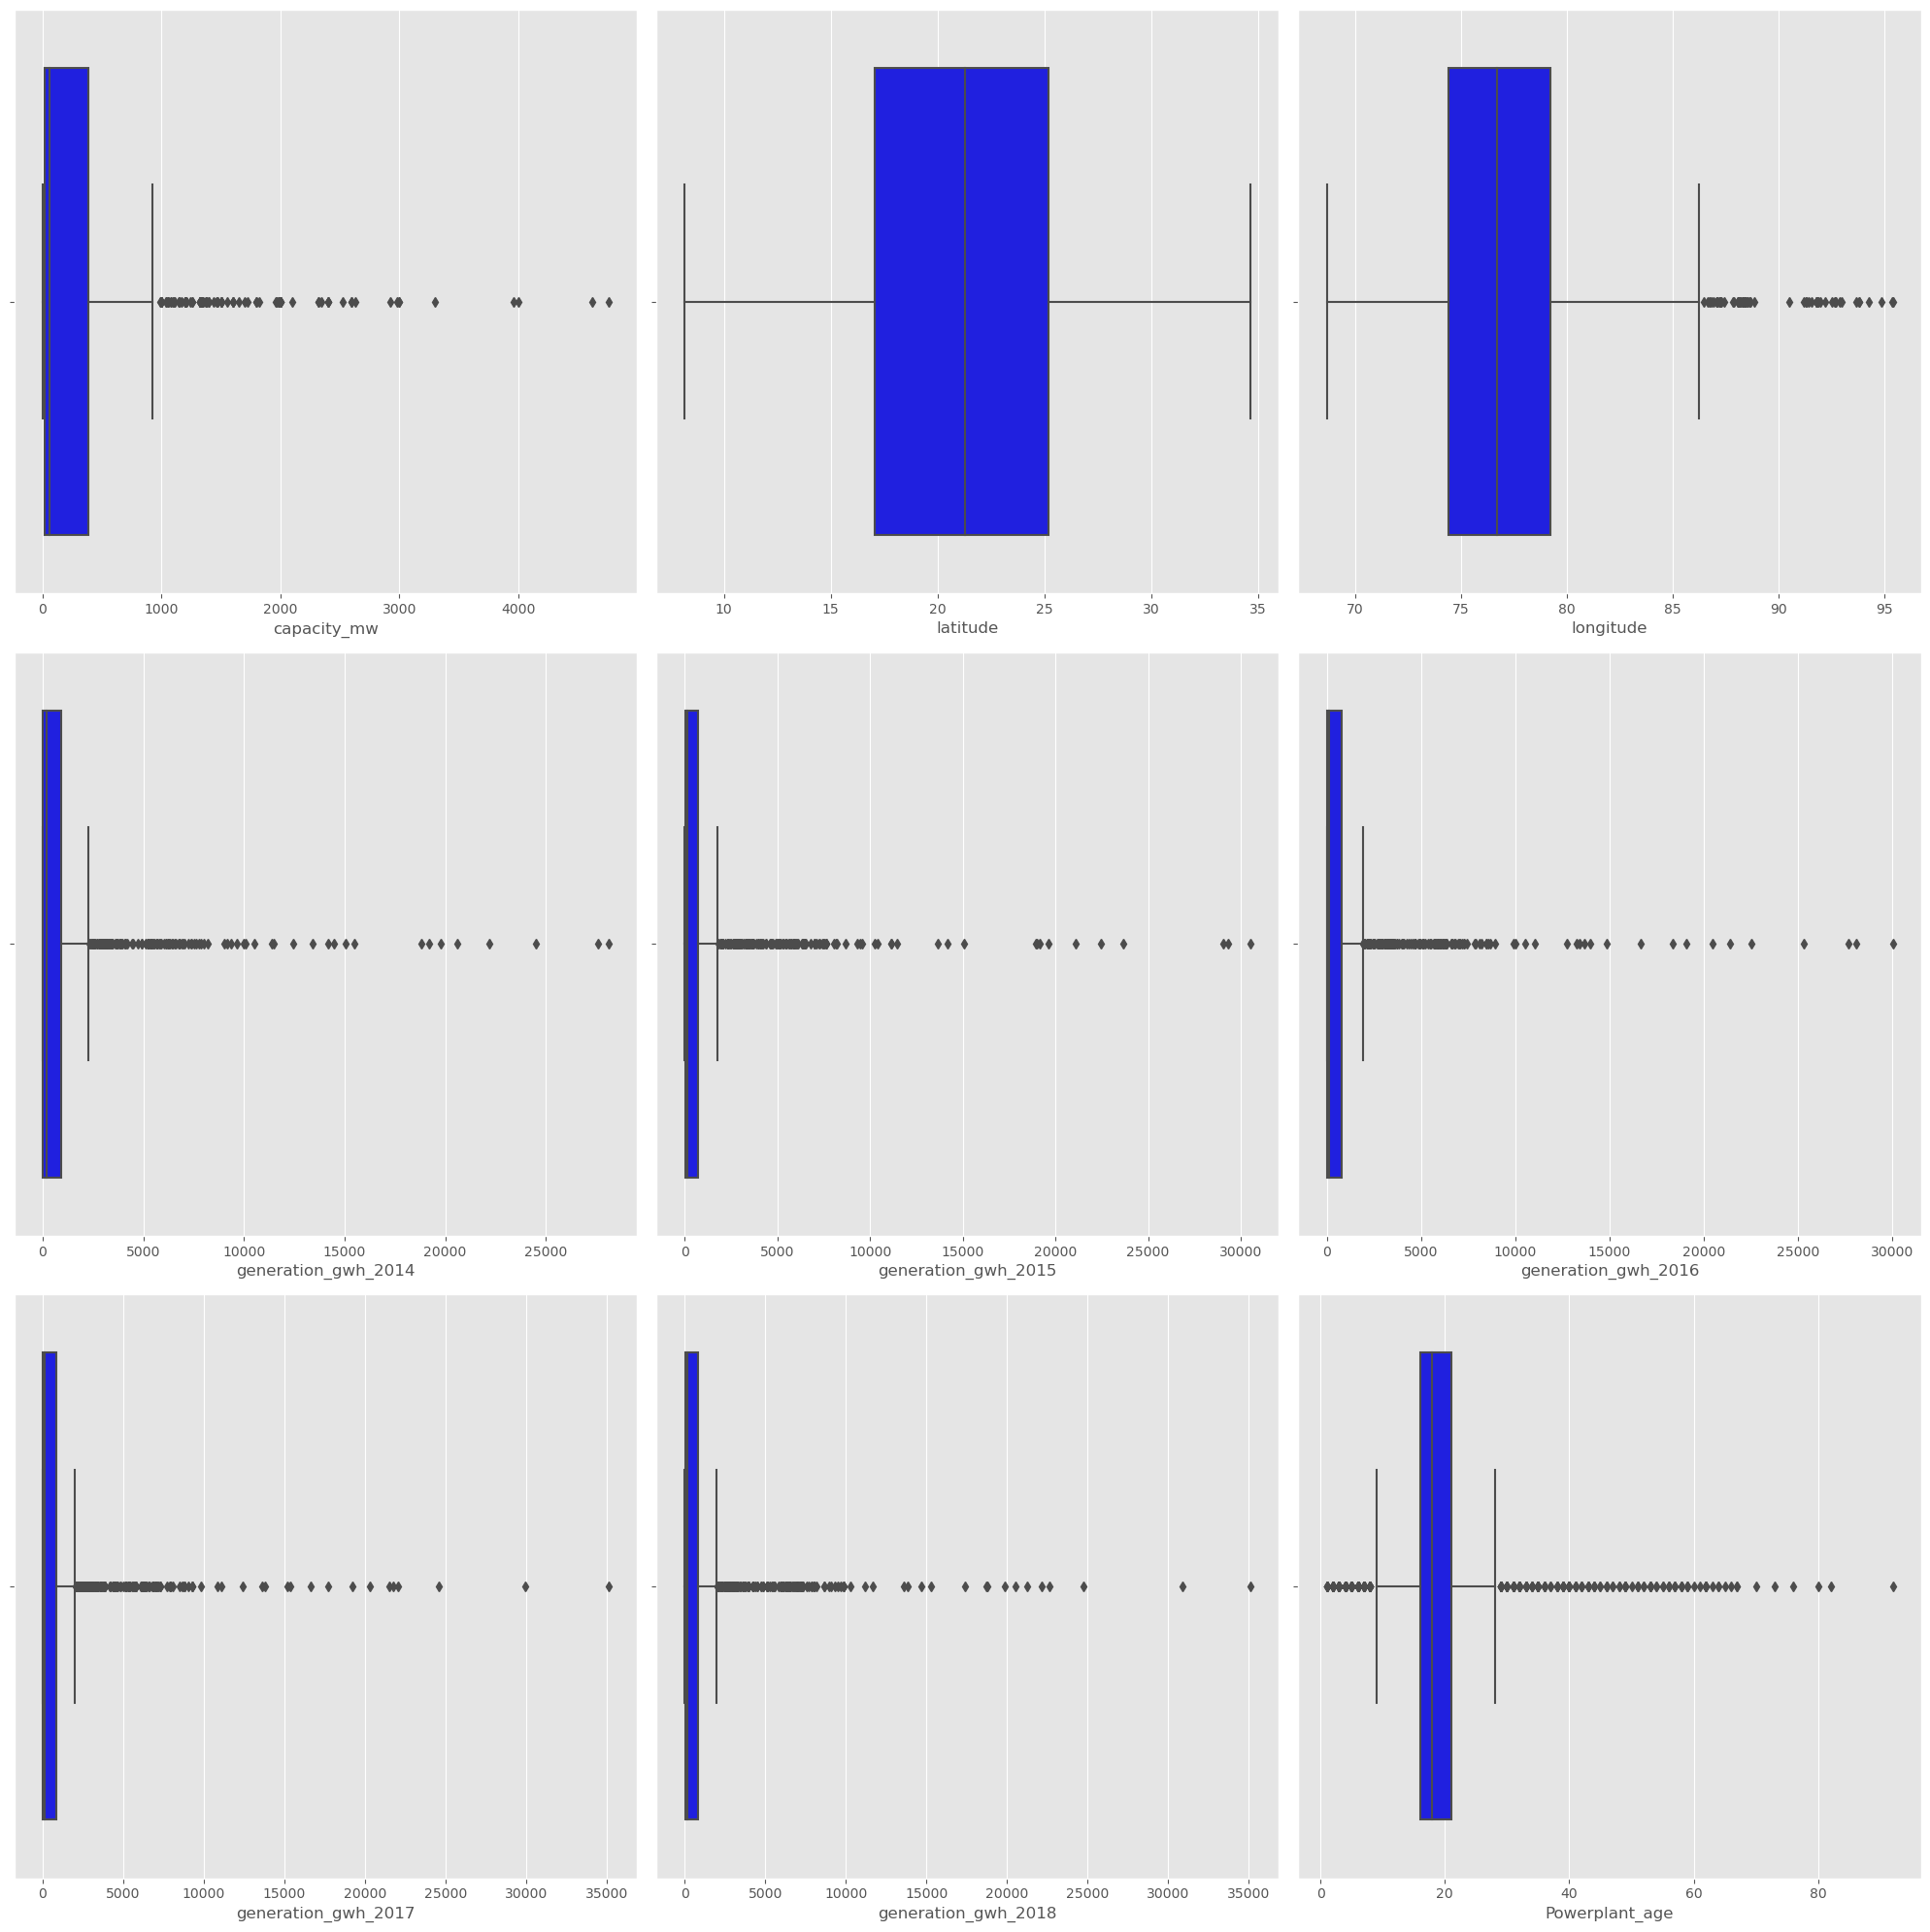

In [46]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


     


Most of the coloumn have outliers so we remove using ZScore method

# Removing outliers

In [47]:
# Features containing outliers
features = data[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))




In [48]:
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,0.869917,0.407783,0.388685,0.394962,0.399239,0.395075,0.933076
1,0.585590,0.303199,0.338753,0.317101,0.340211,0.318779,0.172699
2,1.673567,0.384536,0.356870,0.361220,0.347875,0.349436,0.172699
3,2.895239,0.203542,0.122313,0.115372,0.197893,0.219380,0.400812
4,1.035238,0.618085,1.504758,1.592397,1.284064,1.801917,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.841002,0.392630,0.323355,0.134612,0.201071,1.313265
903,0.153415,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
904,0.383592,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
905,0.764564,0.340967,0.332867,0.328925,0.329901,0.331681,0.172699


In [49]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df


,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [50]:
data.shape
(907-852)/907*100

6.063947078280044

we can see there is 6% of data loss.so this doesnot affect and we can continue

# Encoding

In [51]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]


,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,108,1
1,1,2,173,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,76,0
904,7,2,21,2
905,1,2,59,2


# Skewness of the data

In [52]:
new_df.skew()


capacity_mw             2.178028
latitude               -0.114376
longitude               0.944500
primary_fuel            0.418465
other_fuel1           -19.820871
source                  1.744999
geolocation_source     -2.068499
generation_gwh_2014     2.562088
generation_gwh_2015     2.519395
generation_gwh_2016     2.504234
generation_gwh_2017     2.430029
generation_gwh_2018     2.502936
Powerplant_age          1.278164
dtype: float64

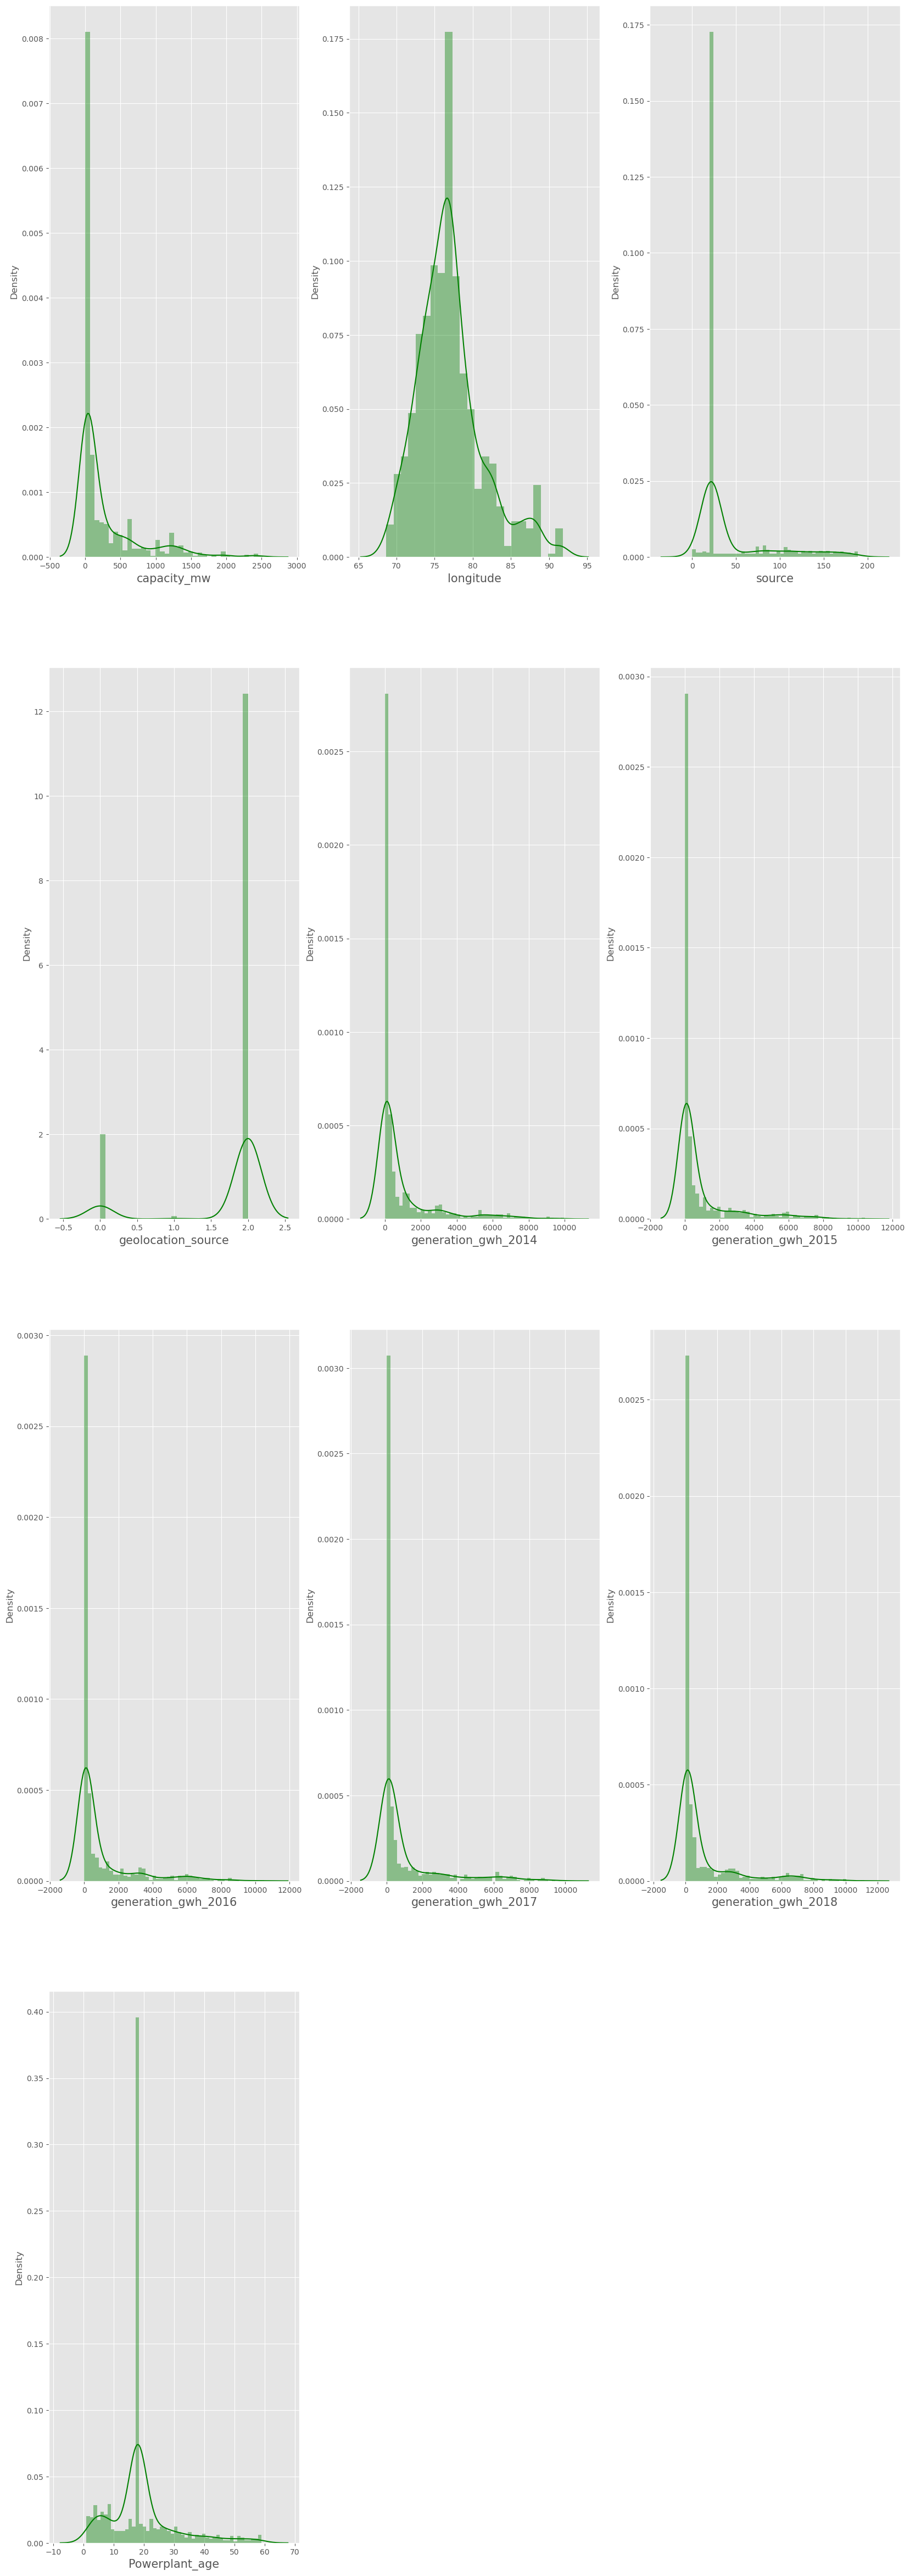

In [53]:
feat=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']]


plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

In [54]:
sk_features=["capacity_mw",'longitude','other_fuel1','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df[sk_features] = scaler.fit_transform(new_df[sk_features].values)
new_df[sk_features].head()


,capacity_mw,longitude,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,0.059444,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,0.059444,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,0.059444,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,0.059444,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,0.059444,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


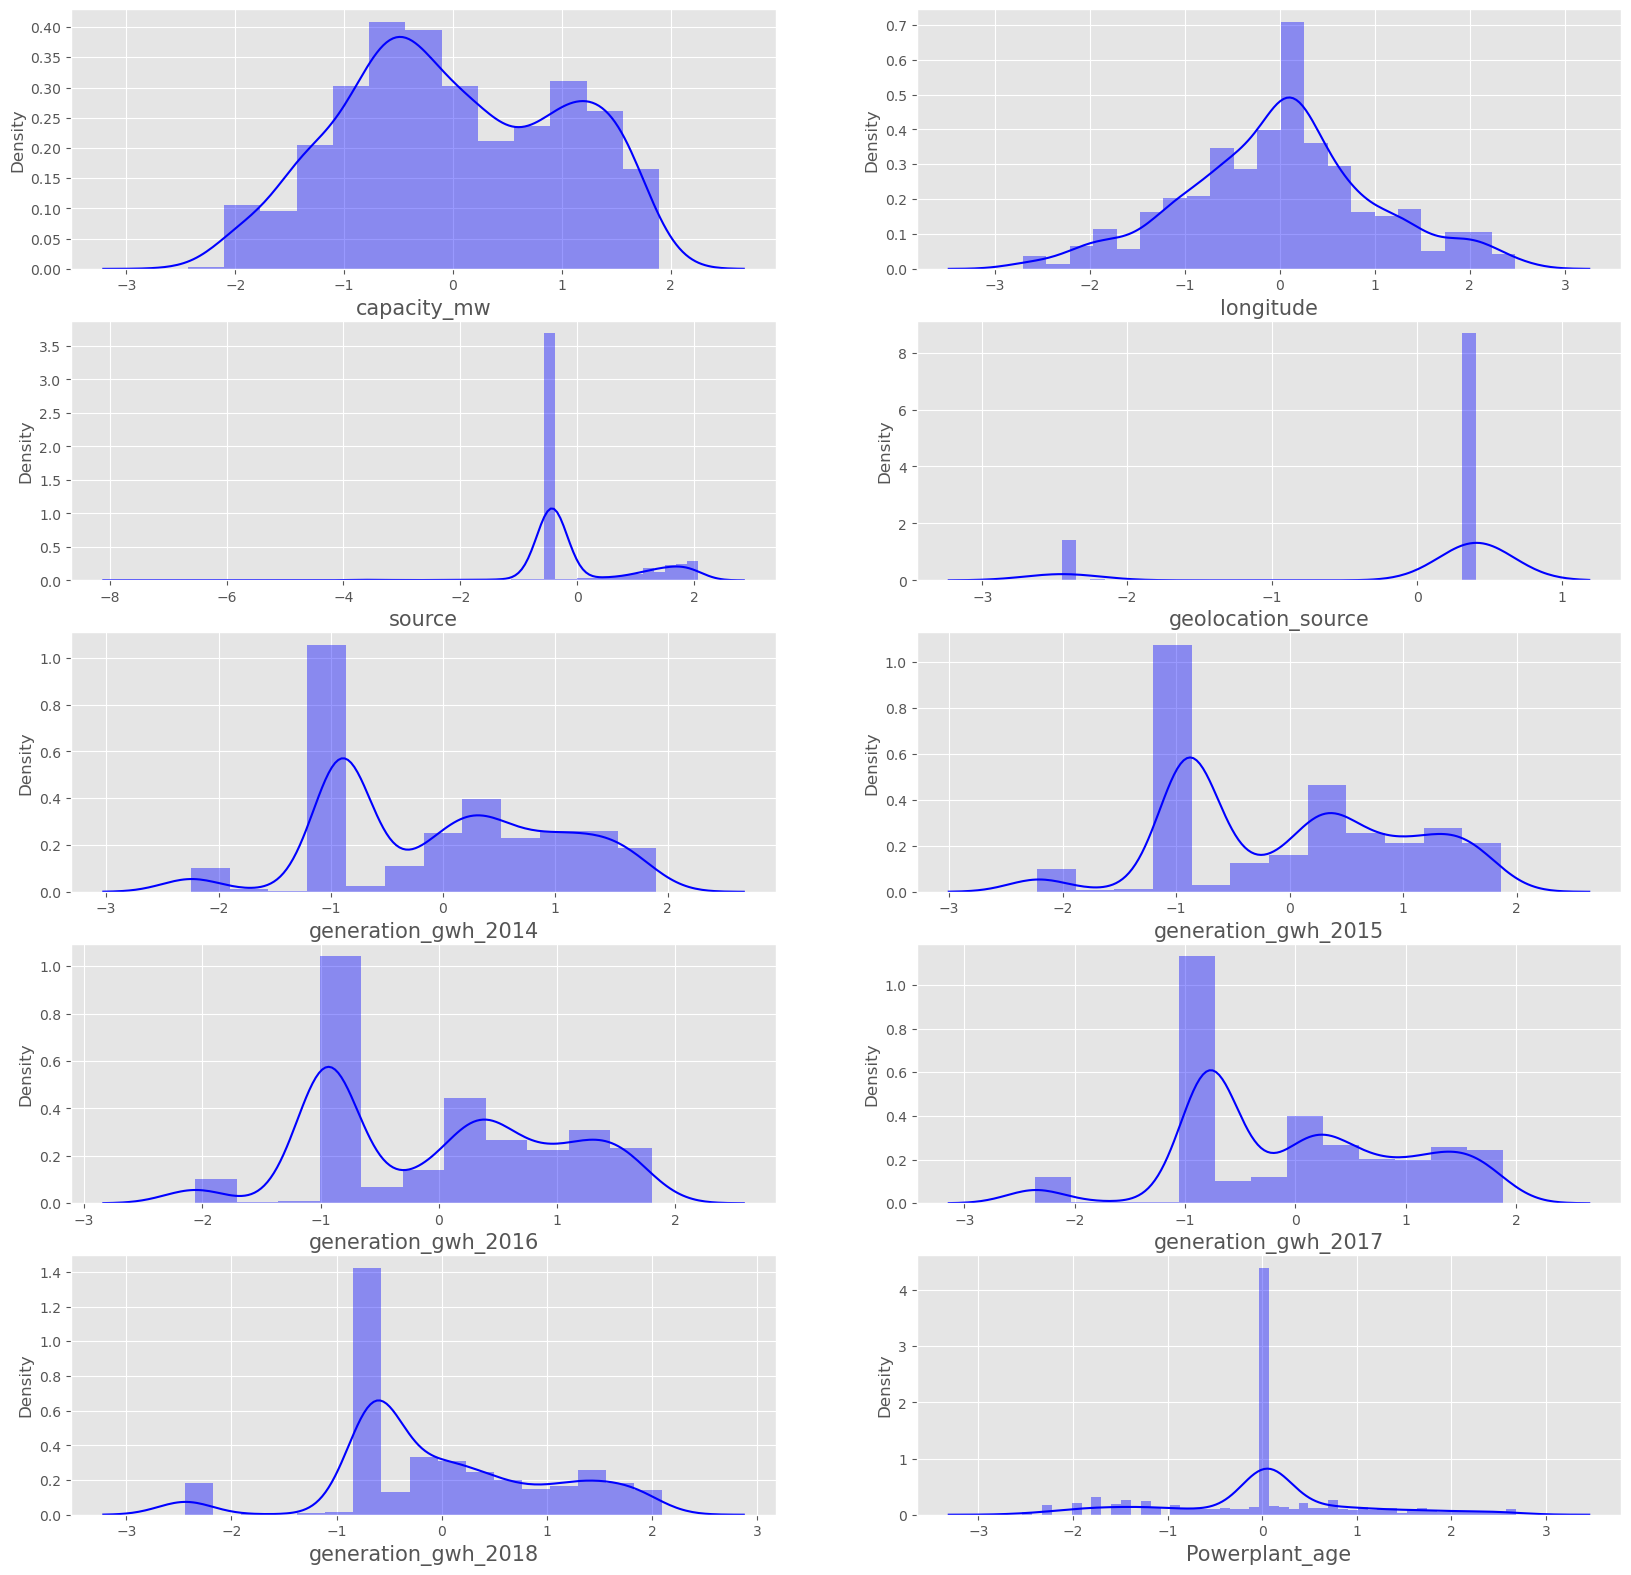

In [55]:
plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(15,2,plotnumber)
        sns.distplot(new_df[column], color = 'b')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()


In [56]:
cor = new_df.corr()
cor


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.057972,0.342446,-0.529581,-0.044733,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
latitude,0.057972,1.000000,-0.069975,-0.000886,0.033249,0.060840,-0.207337,0.127853,0.121847,0.152363,0.140021,0.151176,-0.108286
longitude,0.342446,-0.069975,1.000000,-0.413280,0.039861,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
primary_fuel,-0.529581,-0.000886,-0.413280,1.000000,-0.010352,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
other_fuel1,-0.044733,0.033249,0.039861,-0.010352,1.000000,0.024926,-0.024299,0.004380,0.035902,0.058949,0.022587,0.077934,-0.071462
source,-0.334412,0.060840,-0.198453,0.006314,0.024926,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,-0.207337,0.303271,-0.481369,-0.024299,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.127853,0.267497,-0.376449,0.004380,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.121847,0.247803,-0.371171,0.035902,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.152363,0.297372,-0.398699,0.058949,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588


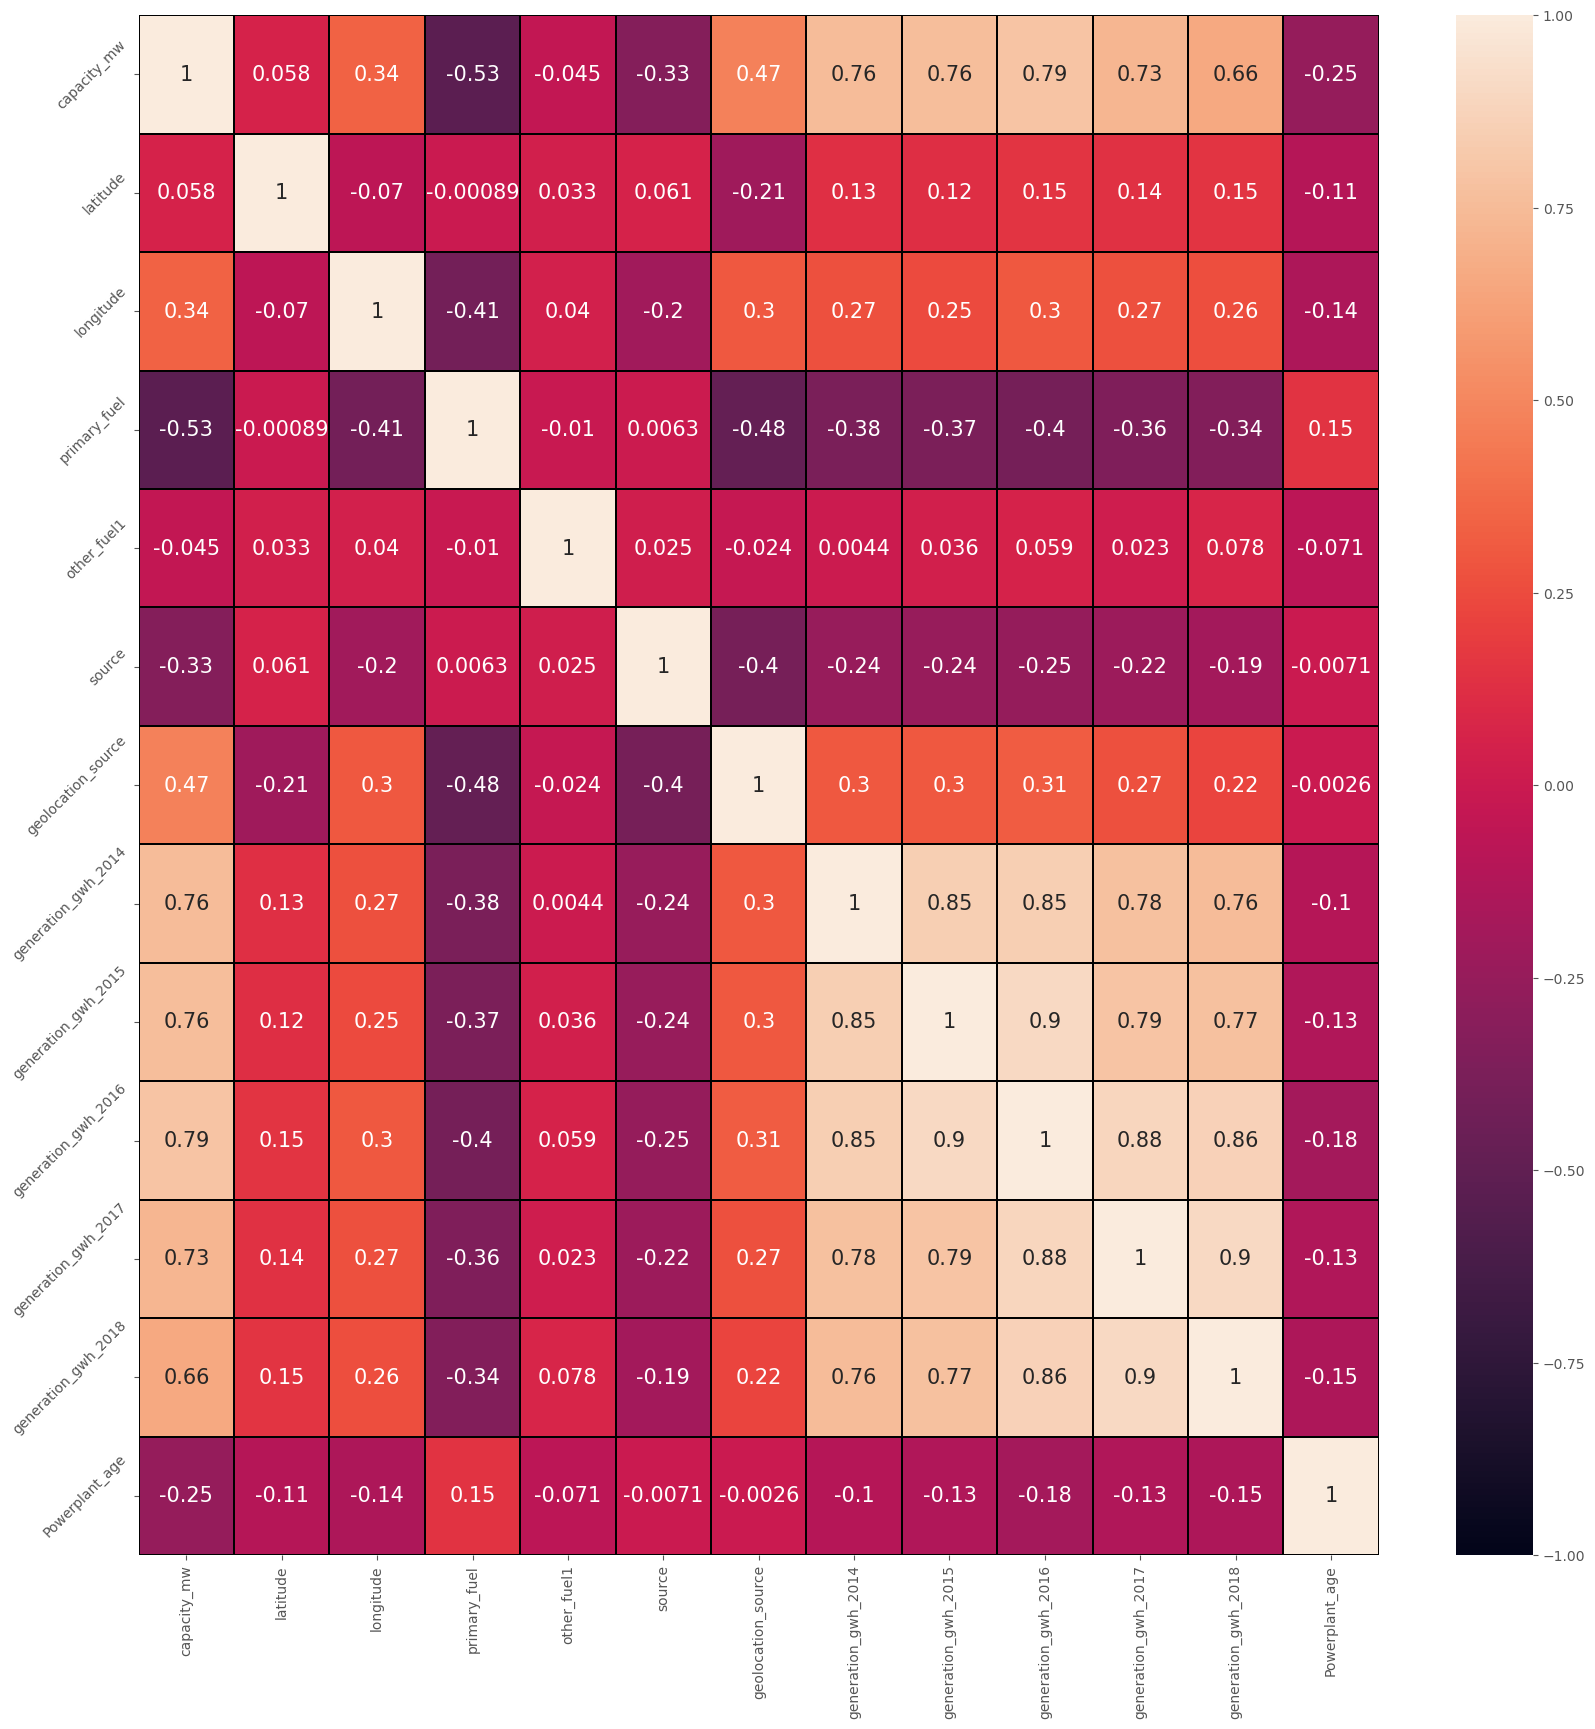

In [57]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15})
plt.yticks(rotation=45);


---> Here in the above plot,capacity_mw is highly positive correlated with the  generation_gwh_2017, generation_gwh_2016,generation_gwh_2015, generation_gwh_2014, generation_gwh_2018
---> Target coloumn  is negatively correlated with the features coloumn source and Power_plant_age.
---> The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

In [58]:
#we can save one Data Frame for regression problem
Classif_data=new_df



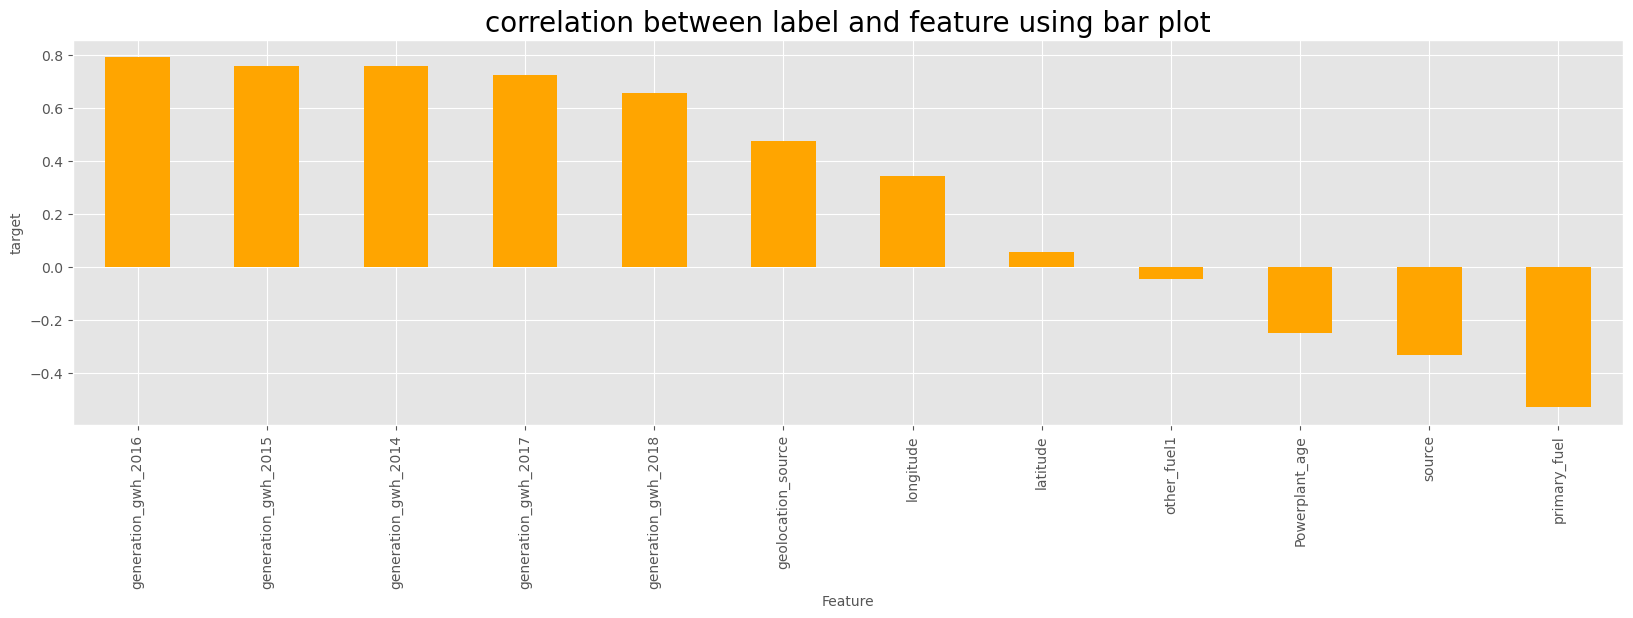

In [59]:
plt.figure(figsize=(20,5))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


In [60]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)
new_df.drop('gppd_idnr',axis=1,inplace=True)


# seperating label and features

In [61]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']
x.head()



,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [62]:
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...
902,0.231036,1,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
903,0.420781,6,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
904,-0.225422,7,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
905,-0.761662,1,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [63]:
y

0     -1.677481
1      0.217991
2     -0.276045
3      0.389150
4      1.727387
         ...   
902    1.668461
903   -1.598358
904   -0.508660
905    0.109050
906   -0.742952
Name: capacity_mw, Length: 852, dtype: float64

# standard scalar

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


     

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,1.177615,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,-0.972680,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,1.607673,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,-0.542621,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,-0.972680,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...
847,0.231036,-0.972680,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,0.420781,1.177615,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.225422,1.607673,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,-0.761662,-0.972680,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [65]:
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,1.177615,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,-0.972680,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,1.607673,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,-0.542621,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,-0.972680,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...
847,0.231036,-0.972680,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,0.420781,1.177615,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.225422,1.607673,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,-0.761662,-0.972680,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


# VIF

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF values,Features
0,1.297178,longitude
1,1.739390,primary_fuel
2,1.361687,source
3,1.662795,geolocation_source
4,4.224308,generation_gwh_2014
5,6.426827,generation_gwh_2015
6,10.785110,generation_gwh_2016
7,7.294450,generation_gwh_2017
8,6.220114,generation_gwh_2018
9,1.078297,Powerplant_age


# Model Building

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod= RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("MAXIMUM r2 score  ",maxAccu," on Random_state =",maxRS)



MAXIMUM r2 score   0.9319256258680284  on Random_state = 129


# SPLITTING TARGET AND FEATURE VARIABLE

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())


R2_Score: 0.9337877753921272
MAE: 0.19523409355061278
MSE: 0.07539224740405154
RMSE: 0.2745764873474266
0.889926388706572


In [70]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())


R2_Score: 0.8734753885535218
MAE: 0.2572430597656371
MSE: 0.14406667145480812
RMSE: 0.37956115640935667
0.810643502122856


In [71]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())


R2_Score: 0.9273982247131203
MAE: 0.21615372178108305
MSE: 0.08266768012731837
RMSE: 0.2875198777951159
0.9008552071434414


In [72]:
# Checking R2 score for  KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())


R2_Score: 0.9006511015364789
MAE: 0.25059709359517646
MSE: 0.11312316987747278
RMSE: 0.33633788052711633
0.8616248582667231


# Hyperparameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)



In [74]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [75]:
GCV.best_params_


{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'log2'}

In [76]:
model = GradientBoostingRegressor(criterion='squared_error', learning_rate= 0.1, loss= 'squared_error',max_features= 'sqrt')
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)


RMSE value: 0.2745764873474266
R2_Score: 92.74627280701353


From the above Reggerssor model,Gradiet Boost Regressor predicts 92.7% R2 score

# Saving the model

In [77]:
import joblib
joblib.dump(model,"Global_Power_Plant.pkl")


['Global_Power_Plant.pkl']

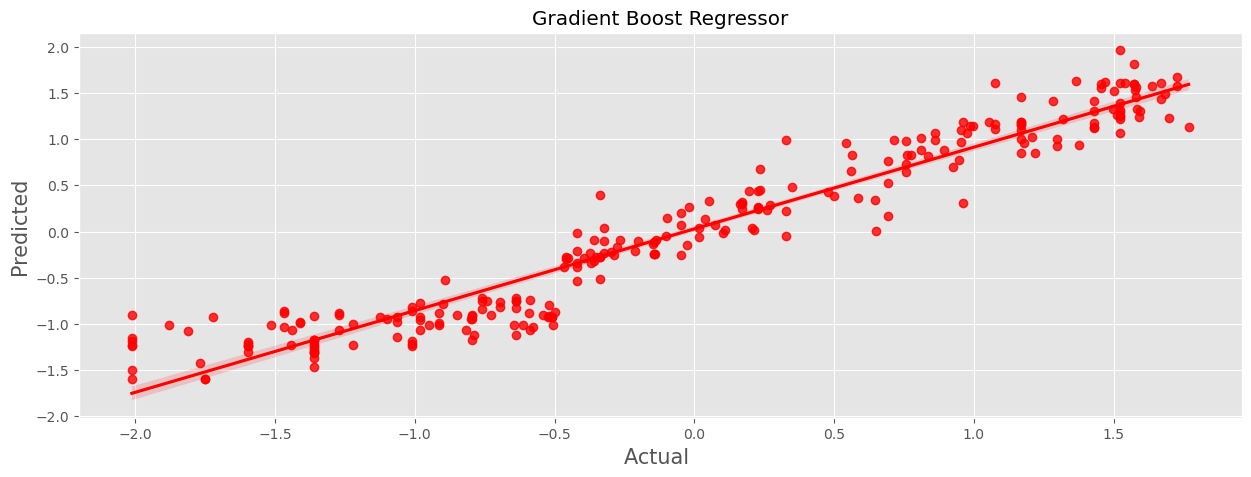

In [78]:
plt.figure(figsize=(15,5))
sns.regplot(y_test,predGB,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()


# Classification Part

In [79]:
Classif_data.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [80]:
Classif_data.corr()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.342446,-0.529581,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
longitude,0.342446,1.000000,-0.413280,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
primary_fuel,-0.529581,-0.413280,1.000000,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
source,-0.334412,-0.198453,0.006314,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,0.303271,-0.481369,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.267497,-0.376449,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.247803,-0.371171,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.297372,-0.398699,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588
generation_gwh_2017,0.725192,0.273371,-0.356194,-0.224322,0.266767,0.776621,0.793076,0.884353,1.000000,0.904954,-0.131981
generation_gwh_2018,0.658112,0.260847,-0.336625,-0.190145,0.223006,0.755111,0.774797,0.862621,0.904954,1.000000,-0.147871


<AxesSubplot:>

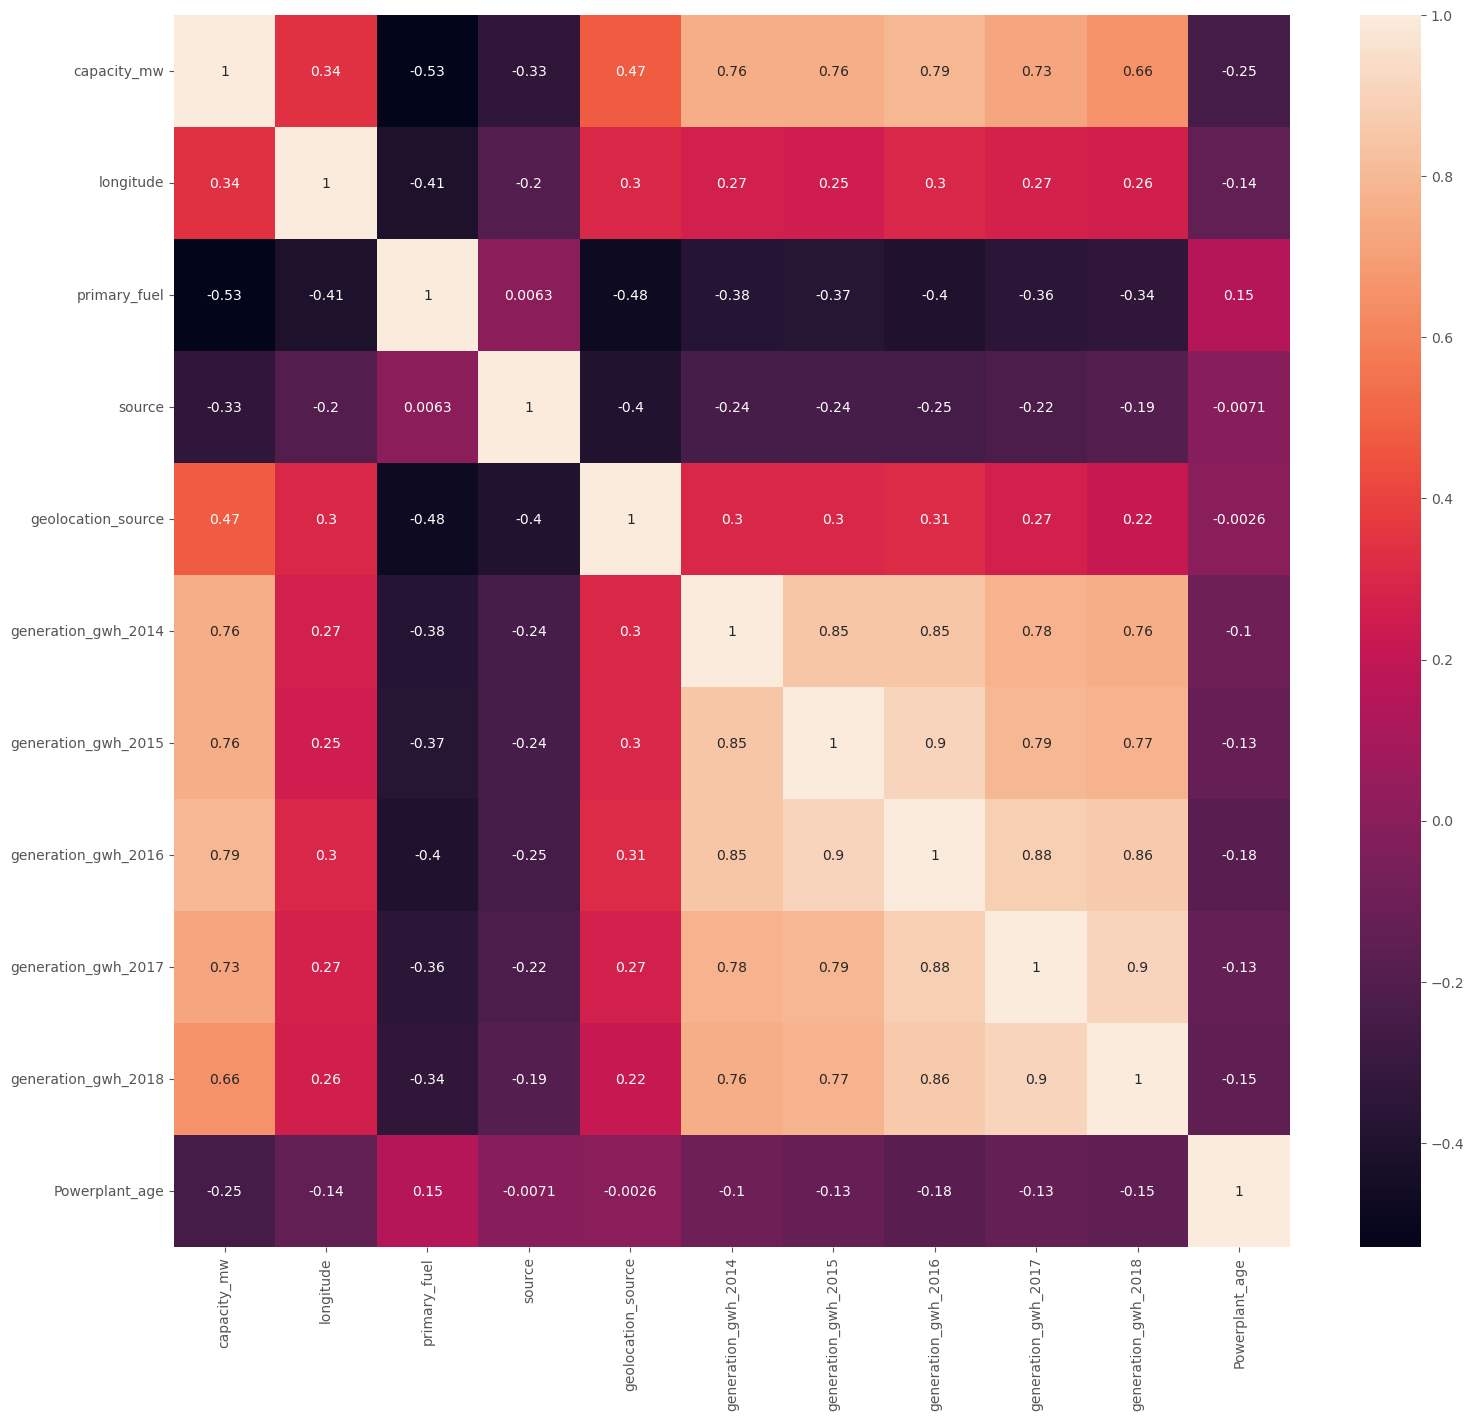

In [81]:
plt.figure(figsize=(18,16))
sns.heatmap(Classif_data.corr(), annot = True)

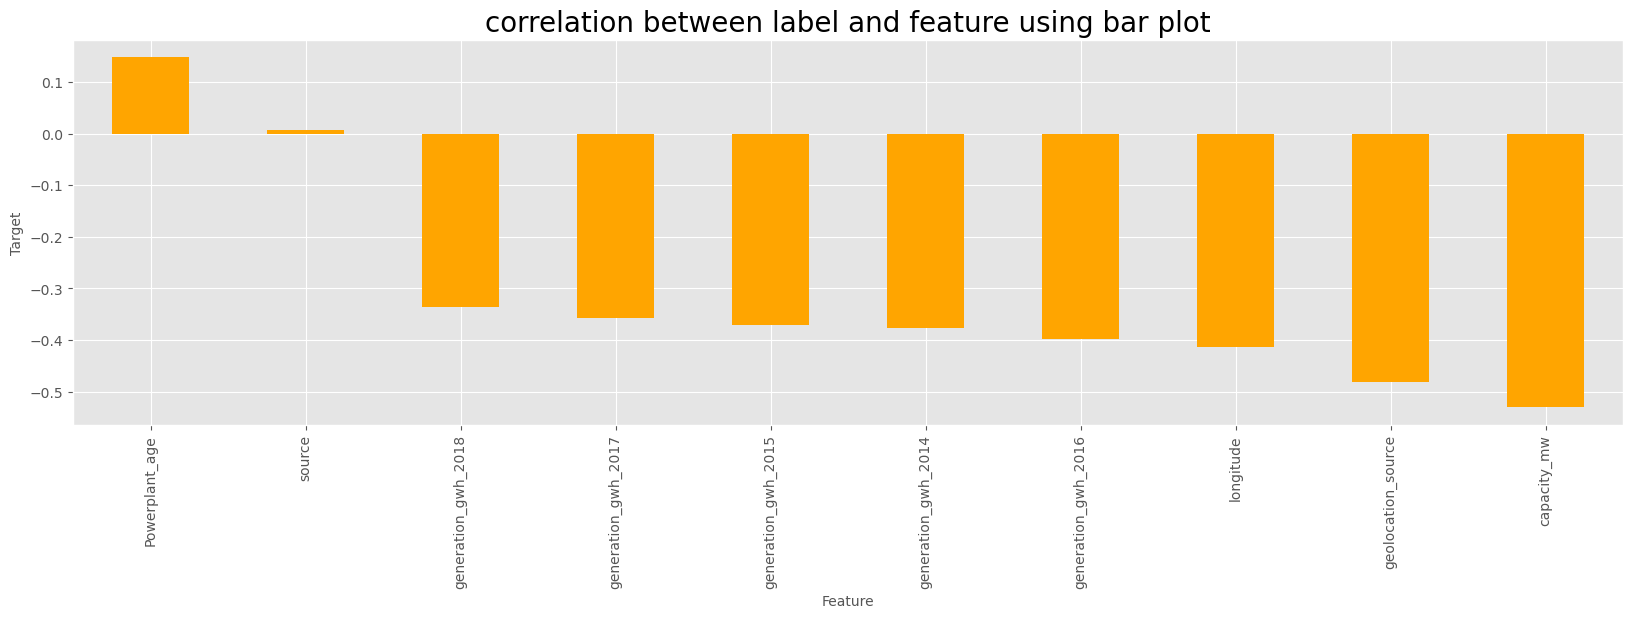

In [82]:
plt.figure(figsize=(20,5))
Classif_data.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [83]:
Classif_data.drop(columns=['source','longitude'],axis=1,inplace=True)
Classif_data.head()


,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,6,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,1,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,7,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [84]:
cl_x=Classif_data.drop("primary_fuel",axis=1)  #features
cl_y=Classif_data['primary_fuel']   #Label


In [85]:
cl_x

,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...
902,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
903,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
904,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
905,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [86]:
cl_y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 852, dtype: int32

# standard Scalar

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cl_x= pd.DataFrame(scaler.fit_transform(cl_x), columns=cl_x.columns)
cl_x


,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...
847,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


# VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(cl_x.values,i)
              for i in range(len(cl_x.columns))]
vif["Features"] = cl_x.columns


In [89]:
vif

,VIF values,Features
0,3.814449,capacity_mw
1,1.350136,geolocation_source
2,4.444195,generation_gwh_2014
3,6.465385,generation_gwh_2015
4,11.077630,generation_gwh_2016
5,7.530329,generation_gwh_2017
6,6.381029,generation_gwh_2018
7,1.139573,Powerplant_age


In [90]:
# Oversampling the data
!pip install imblearn

from imblearn.over_sampling import SMOTE
SM = SMOTE()
cl_x, cl_y = SM.fit_resample(cl_x,cl_y)
cl_y.value_counts()


     

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

# Model Building

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy ",maxAccu," on Random_state = ",maxRS)



Best accuracy  0.8229166666666666  on Random_state =  43


In [92]:
clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.30, random_state =maxRS)


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)
pred = DTC.predict(clx_test)
print(accuracy_score(cly_test, pred))
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())


0.8125
[[65  2  0  0  0  6  0  3]
 [ 6 35  4  6  6  0  0  4]
 [ 3  6 48 10  0  0  0  3]
 [ 0 10  3 49  1  1  0  0]
 [ 0  4  0  1 80  0  0  0]
 [ 3  0  1  2  0 58  0  3]
 [ 0  1  0  1  0  0 83  0]
 [11  2  3  0  0  2  0 50]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        76
           1       0.58      0.57      0.58        61
           2       0.81      0.69      0.74        70
           3       0.71      0.77      0.74        64
           4       0.92      0.94      0.93        85
           5       0.87      0.87      0.87        67
           6       1.00      0.98      0.99        85
           7       0.79      0.74      0.76        68

    accuracy                           0.81       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.81      0.81      0.81       576

0.7536458333333333


In [94]:
###Randon Forest classifier
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

#Prediction
pred = RFC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(RFC,cl_x,cl_y,cv=5).mean()*100)


     

84.02777777777779
[[62  5  0  0  0  6  0  3]
 [ 3 41  6  3  5  0  0  3]
 [ 2  6 58  1  0  0  0  3]
 [ 0  6  6 47  1  1  1  2]
 [ 0  0  0  1 84  0  0  0]
 [ 3  0  1  2  0 58  0  3]
 [ 0  0  0  1  0  0 84  0]
 [11  3  2  0  0  2  0 50]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        76
           1       0.67      0.67      0.67        61
           2       0.79      0.83      0.81        70
           3       0.85      0.73      0.79        64
           4       0.93      0.99      0.96        85
           5       0.87      0.87      0.87        67
           6       0.99      0.99      0.99        85
           7       0.78      0.74      0.76        68

    accuracy                           0.84       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.84      0.84      0.84       576

Corross Validation Score 80.78125


In [95]:
####Support Vector Machine

SVM = SVC()
SVM.fit(clx_train,cly_train)

#Prediction
pred = SVM.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(SVM,cl_x,cl_y,cv=5).mean()*100)


70.3125
[[74  0  0  0  0  0  0  2]
 [ 7 22 11  0 15  0  0  6]
 [ 2  3 44  2  5  3  0 11]
 [ 6  8  6 30  5  1  0  8]
 [ 0  4  0  0 81  0  0  0]
 [20  0  0  0  0 37  0 10]
 [ 0  2  0  0  0  0 83  0]
 [31  0  3  0  0  0  0 34]]
              precision    recall  f1-score   support

           0       0.53      0.97      0.69        76
           1       0.56      0.36      0.44        61
           2       0.69      0.63      0.66        70
           3       0.94      0.47      0.62        64
           4       0.76      0.95      0.85        85
           5       0.90      0.55      0.69        67
           6       1.00      0.98      0.99        85
           7       0.48      0.50      0.49        68

    accuracy                           0.70       576
   macro avg       0.73      0.68      0.68       576
weighted avg       0.74      0.70      0.69       576

Corross Validation Score 67.23958333333333


In [96]:
###KNN Method

knn = KNN()
knn.fit(clx_train,cly_train)

#Prediction
pred = knn.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(knn,cl_x,cl_y,cv=5).mean()*100)



82.29166666666666
[[68  1  0  0  0  4  0  3]
 [ 6 36  5  4  7  1  0  2]
 [ 1  4 52  1  3  2  0  7]
 [ 0  9  5 41  2  2  0  5]
 [ 0  3  0  0 82  0  0  0]
 [ 2  0  2  0  0 62  0  1]
 [ 0  0  0  1  0  0 84  0]
 [10  4  2  0  0  3  0 49]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        76
           1       0.63      0.59      0.61        61
           2       0.79      0.74      0.76        70
           3       0.87      0.64      0.74        64
           4       0.87      0.96      0.92        85
           5       0.84      0.93      0.88        67
           6       1.00      0.99      0.99        85
           7       0.73      0.72      0.73        68

    accuracy                           0.82       576
   macro avg       0.81      0.81      0.81       576
weighted avg       0.82      0.82      0.82       576

Corross Validation Score 77.1875


In [97]:
GBC = GradientBoostingClassifier()
GBC.fit(clx_train,cly_train)

#Prediction
pred = GBC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)


     

82.29166666666666
[[64  2  0  0  0  6  0  4]
 [ 6 36  2  6  3  1  1  6]
 [ 1  5 46  9  1  1  0  7]
 [ 0  5  7 50  1  1  0  0]
 [ 0  2  0  1 82  0  0  0]
 [ 2  0  1  0  0 60  0  4]
 [ 0  1  0  1  0  0 83  0]
 [ 6  3  2  0  0  4  0 53]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        76
           1       0.67      0.59      0.63        61
           2       0.79      0.66      0.72        70
           3       0.75      0.78      0.76        64
           4       0.94      0.96      0.95        85
           5       0.82      0.90      0.86        67
           6       0.99      0.98      0.98        85
           7       0.72      0.78      0.75        68

    accuracy                           0.82       576
   macro avg       0.81      0.81      0.81       576
weighted avg       0.82      0.82      0.82       576

Corross Validation Score 80.10416666666667


# Hyperparameter Tuning

In [98]:
parameters={'loss' : ['log_loss', 'deviance', 'exponential'],
           'n_estimators':[1,20,50,100],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
           }
gridsearch=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)


In [ ]:
gridsearch.fit(clx_train,cly_train)

In [ ]:
gridsearch.best_params_


In [ ]:
model=GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.5,loss= 'log_loss',n_estimators=100)


In [ ]:
model.fit(clx_train, cly_train)
pred = model.predict(clx_test)
acc=accuracy_score(cly_test,pred)
print("Accuracy Score",acc*100)



# saving the model

In [ ]:
import joblib
joblib.dump(model,"Global_Power_Plant_Fuel.pkl")



In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(cly_test,pred,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Classifier")
plt.show()



# Conclusion

For the capacity_mw model we got best accuracy from Gradient Booster regressor of 92.8%

for the primary _fuel model we got best accuracy from Gradient Booster regressor of 81.59%